In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Load Processed Data

In [2]:
df = pd.read_csv("../data/processed/heart_cleaned.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_squared,chol_age_ratio,bp_age_ratio,cardiac_stress_score,vessel_severity,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,2704,4.076923,2.403846,1.005917,6,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,2809,3.830189,2.641509,4.106410,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,4900,2.485714,2.071429,3.607937,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,3721,3.327869,2.426230,0.006173,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,3844,4.741935,2.225806,1.909346,6,0


# Split Features & Target

In [3]:
X = df.drop("target", axis=1)
y = df["target"]


# Train / Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Train Constrained Random Forest

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Risk Scoring Logic

* Predict Probabilities

In [6]:
risk_probabilities = rf_model.predict_proba(X_test)[:, 1]


* Convert Probability → Risk Score

In [8]:
risk_scores = risk_probabilities * 100


# Define Risk Categories

In [9]:
def assign_risk_category(score):
    if score < 40:
        return "Low Risk"
    elif score < 70:
        return "Medium Risk"
    else:
        return "High Risk"


In [10]:
risk_categories = [assign_risk_category(score) for score in risk_scores]


# Build Risk Report

In [11]:
risk_report = X_test.copy()
risk_report["Actual_Target"] = y_test.values
risk_report["Risk_Probability"] = risk_probabilities
risk_report["Risk_Score"] = risk_scores
risk_report["Risk_Category"] = risk_categories

risk_report.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,age_squared,chol_age_ratio,bp_age_ratio,cardiac_stress_score,vessel_severity,Actual_Target,Risk_Probability,Risk_Score,Risk_Category
756,64,1,0,120,246,0,0,96,1,2.2,...,2,4096,3.843750,1.875000,3.210309,2,0,0.073183,7.318288,Low Risk
353,57,1,0,110,201,0,1,126,1,1.5,...,1,3249,3.526316,1.929825,2.507874,0,1,0.432020,43.202013,Medium Risk
929,60,1,0,130,206,0,0,132,1,2.4,...,3,3600,3.433333,2.166667,3.407519,6,0,0.007625,0.762509,Low Risk
129,57,1,0,140,192,0,1,148,0,0.4,...,1,3249,3.368421,2.456140,0.406711,0,1,0.784226,78.422626,High Risk
591,63,0,0,108,269,0,1,169,1,1.8,...,2,3969,4.269841,1.714286,2.805882,4,0,0.105605,10.560512,Low Risk


# Risk Distribution Visualization

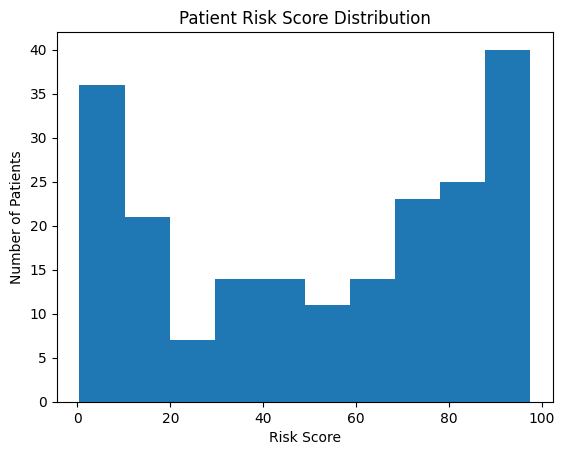

In [14]:
plt.figure()
plt.hist(risk_scores, bins=10)
plt.xlabel("Risk Score")
plt.ylabel("Number of Patients")
plt.title("Patient Risk Score Distribution")
plt.show()


# Save Risk Distribution Figure

In [15]:
plt.figure()
plt.hist(risk_scores, bins=10)
plt.xlabel("Risk Score")
plt.ylabel("Number of Patients")
plt.title("Patient Risk Score Distribution")
plt.savefig("../results/figures/risk_distribution.png")
plt.close()


# Save Risk Report

In [16]:
risk_report.to_csv("../results/reports/patient_risk_report.csv", index=False)


## Risk Scoring Summary

- Converted model predictions into interpretable risk scores (0–100).
- Patients were categorized into Low, Medium, and High risk groups.
- The risk scoring system provides decision-support rather than binary predictions.
- This approach enhances interpretability for healthcare applications.
